In [1]:
# Initialize and Import Required Modules

In [2]:
# General Libraries
import torch
import argparse
import numpy as np
import random
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [3]:


# Test minst 122



In [4]:
# Import the MNIST Autoencoder file
import MNIST_122  

# Set device
device = "cuda" if torch.cuda.is_available() else "cpu"

# Define arguments
args = argparse.Namespace(
    data_path="../data",
    batch_size=128,
    latent_dim=128,
    device=device
)

In [5]:
#Load the Dataset and Check It

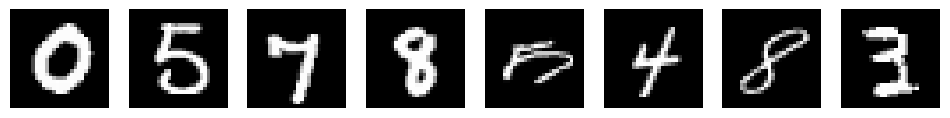

In [6]:
# Load dataset
train_loader, val_loader, test_loader = MNIST_122.load_data(args)

# Retrieve a batch of images
images_0_1, _ = next(iter(train_loader))

# Convert images to range [0,255] for proper display
images_0_255 = images_0_1 * 255  # Scale if needed

# Visualize some images
fig, axes = plt.subplots(1, 8, figsize=(12, 4))
for i in range(8):
    img = images_0_255[i].permute(1, 2, 0).numpy()  # Convert (C, H, W) → (H, W, C)
    img = np.clip(img, 0, 255).astype("uint8")  # Ensure valid pixel values
    axes[i].imshow(img.squeeze(), cmap="gray")  
    axes[i].axis("off")

plt.show()


In [7]:
#Verify the Autoencoder Model Architecture

In [8]:
# Initialize model
encoder_model = MNIST_122.Encoder(args.latent_dim).to(args.device)

# Print model summary
print(encoder_model)

Encoder(
  (encoder): Sequential(
    (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (3): ReLU()
    (4): Flatten(start_dim=1, end_dim=-1)
    (5): Linear(in_features=1568, out_features=128, bias=True)
  )
)


In [9]:
# Initialize model
classifier_model = MNIST_122.Classifier(args.latent_dim).to(args.device)

# Print model summary
print(classifier_model)

Classifier(
  (fc): Sequential(
    (0): Linear(in_features=128, out_features=64, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.2, inplace=False)
    (3): Linear(in_features=64, out_features=10, bias=True)
  )
)


In [10]:
#Train the model

In [11]:
MNIST_122.train_encoder_classifier(encoder_model, classifier_model, train_loader, val_loader, args, epochs=20)

Epoch [1/20], Train Loss: 0.4824, Train Acc: 85.06%, Val Loss: 0.1656, Val Acc: 94.94%


Epoch [2/20], Train Loss: 0.1447, Train Acc: 95.70%, Val Loss: 0.0958, Val Acc: 97.13%


Epoch [3/20], Train Loss: 0.0958, Train Acc: 97.06%, Val Loss: 0.0789, Val Acc: 97.50%


Epoch [4/20], Train Loss: 0.0758, Train Acc: 97.68%, Val Loss: 0.0644, Val Acc: 97.97%


Epoch [5/20], Train Loss: 0.0652, Train Acc: 98.03%, Val Loss: 0.0661, Val Acc: 97.92%


Epoch [6/20], Train Loss: 0.0584, Train Acc: 98.15%, Val Loss: 0.0580, Val Acc: 98.20%


Epoch [7/20], Train Loss: 0.0485, Train Acc: 98.46%, Val Loss: 0.0648, Val Acc: 97.99%


Epoch [8/20], Train Loss: 0.0455, Train Acc: 98.57%, Val Loss: 0.0591, Val Acc: 98.19%


Epoch [9/20], Train Loss: 0.0404, Train Acc: 98.66%, Val Loss: 0.0583, Val Acc: 98.23%


Epoch [10/20], Train Loss: 0.0357, Train Acc: 98.81%, Val Loss: 0.0554, Val Acc: 98.48%


Epoch [11/20], Train Loss: 0.0328, Train Acc: 98.94%, Val Loss: 0.0593, Val Acc: 98.27%


Epoch [12/20], Train Loss: 0.0319, Train Acc: 98.96%, Val Loss: 0.0607, Val Acc: 98.23%


Epoch [13/20], Train Loss: 0.0272, Train Acc: 99.10%, Val Loss: 0.0712, Val Acc: 98.10%


Epoch [14/20], Train Loss: 0.0242, Train Acc: 99.25%, Val Loss: 0.0599, Val Acc: 98.38%


Epoch [15/20], Train Loss: 0.0268, Train Acc: 99.11%, Val Loss: 0.0564, Val Acc: 98.60%


Epoch [16/20], Train Loss: 0.0216, Train Acc: 99.26%, Val Loss: 0.0558, Val Acc: 98.47%


Epoch [17/20], Train Loss: 0.0190, Train Acc: 99.34%, Val Loss: 0.0601, Val Acc: 98.49%


Epoch [18/20], Train Loss: 0.0204, Train Acc: 99.26%, Val Loss: 0.0675, Val Acc: 98.36%


Epoch [19/20], Train Loss: 0.0184, Train Acc: 99.36%, Val Loss: 0.0700, Val Acc: 98.40%


Epoch [20/20], Train Loss: 0.0177, Train Acc: 99.42%, Val Loss: 0.0657, Val Acc: 98.47%
